###**SUPERVISED LEARNING FOR 5000 SAMPLES PER CLASS.**

# Import Data for X and y

In [15]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

In [16]:
with open('/content/df_features_train5000.pickle', 'rb') as f:
    df_train = pickle.load(f)

In [5]:
df_train.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_116-069-127,0,-557.202515,5.753622,0.981412,1.122305,-0.707372,-0.898609,-2.331761,-2.756625,-2.927740,...,0.201430,0.145789,0.131073,0.208323,0.217919,0.228780,0.417073,0.268706,0.291228,0
bass_synthetic_018-045-050,1,-485.269135,36.706520,1.167640,9.230674,6.142095,1.939157,0.921259,2.714334,2.793374,...,0.070766,0.107711,0.089044,0.094892,0.183850,0.316033,0.617227,0.313992,0.194215,0
bass_synthetic_011-040-075,0,-133.168488,111.227852,-37.395962,53.720230,-23.686741,31.263220,-22.156073,11.038134,-9.746903,...,0.144702,0.892014,0.050649,0.004439,0.000000,0.186057,0.000895,0.000000,0.327075,0
bass_synthetic_076-046-050,0,-382.084808,118.211998,26.205984,30.567608,59.839611,35.354507,12.117772,24.512486,22.956745,...,0.025208,0.017774,0.017762,0.017743,0.034988,0.064068,0.182555,0.841185,0.145308,0
bass_synthetic_136-070-075,0,-569.803589,25.864410,14.324016,12.227025,7.293108,4.873456,2.179953,1.358275,1.030449,...,0.263737,0.236430,0.261355,0.279773,0.167548,0.234745,0.059394,0.464480,0.081960,0


In [17]:
df_train.shape

(50000, 167)

In [18]:
with open('/content/df_features_test.pickle', 'rb') as f:
    df_test = pickle.load(f)

In [ ]:
df_test.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_068-049-025,1,-522.865845,46.664154,34.379803,24.787596,17.420425,10.198804,4.609536,1.380600,-1.023340,...,0.034162,0.035634,0.025365,0.019434,0.039115,0.092514,0.086638,0.061319,0.091409,0
keyboard_electronic_001-021-127,0,-444.644012,193.890533,27.298918,-3.689526,6.295263,8.093068,10.283858,6.089181,2.495069,...,0.392218,0.563529,0.143236,0.164834,0.211634,0.353580,0.422365,0.019230,0.009007,4
guitar_acoustic_010-066-100,0,-439.373413,59.546818,2.895078,-12.039842,-12.553241,-11.451952,-12.535439,-20.456724,-19.256969,...,0.072573,0.091863,0.090990,0.840737,0.093613,0.048391,0.030883,0.015003,0.009667,3
reed_acoustic_037-068-127,1,-372.987457,68.796799,-39.474766,-22.089413,-50.149693,-16.565742,-29.849129,-16.627386,-17.712204,...,0.366166,0.036109,0.006731,0.023056,0.020713,0.885966,0.061736,0.016221,0.002263,7
flute_acoustic_002-077-100,1,-364.779663,12.566915,-42.826504,19.884624,-29.598232,-21.321131,-18.308311,-9.495085,7.672026,...,0.037789,0.052419,0.910790,0.022027,0.030132,0.009579,0.028886,0.048302,0.016970,2


In [19]:
df_test.shape

(4096, 167)

In [20]:
#get training and testing data
X_train = df_train.drop(labels=['targets'], axis=1)
y_train = df_train['targets']

X_test = df_test.drop(labels=['targets'], axis=1)
y_test = df_test['targets']

# Define Confusion Matrix Function

In [21]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [22]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar',
             'keyboard', 'mallet', 'organ', 'reed',
             'string', 'vocal'])

# Naive Bayes

In [ ]:
#instantiate the classifier
clf_NB = GaussianNB()

In [ ]:
#Train
clf_NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = clf_NB.predict(X_test)
accuracy_NB = np.mean(y_pred_NB == y_test)
print("The accuracy of Naive Bayes is {0:.2%}".format(accuracy_NB))

The accuracy of Naive Bayes is 12.52%


Normalized confusion matrix
[[0.00237248 0.03202847 0.         0.02372479 0.14353499 0.13641756
  0.         0.02491103 0.59905101 0.03795967]
 [0.02973978 0.28252788 0.         0.16356877 0.0260223  0.02230483
  0.01115242 0.00743494 0.39033457 0.0669145 ]
 [0.01111111 0.25555556 0.09444444 0.         0.20555556 0.05
  0.01111111 0.08888889 0.28333333 0.        ]
 [0.00153374 0.18558282 0.01226994 0.00766871 0.09662577 0.02453988
  0.00153374 0.01687117 0.65337423 0.        ]
 [0.         0.12793734 0.         0.00522193 0.04046997 0.01827676
  0.         0.00130548 0.80678851 0.        ]
 [0.         0.03960396 0.         0.0049505  0.0049505  0.04455446
  0.         0.         0.88613861 0.01980198]
 [0.00996016 0.41832669 0.06573705 0.02191235 0.15338645 0.00398406
  0.09163347 0.03784861 0.16733068 0.02988048]
 [0.00851064 0.46382979 0.0212766  0.00425532 0.00425532 0.
  0.00851064 0.00425532 0.48510638 0.        ]
 [0.         0.10130719 0.         0.         0.02941176 0.0032679

<Axes: title={'center': 'Naive Bayes Normalized confusion matrix - 5000 samples'}, xlabel='Predicted label', ylabel='True label'>

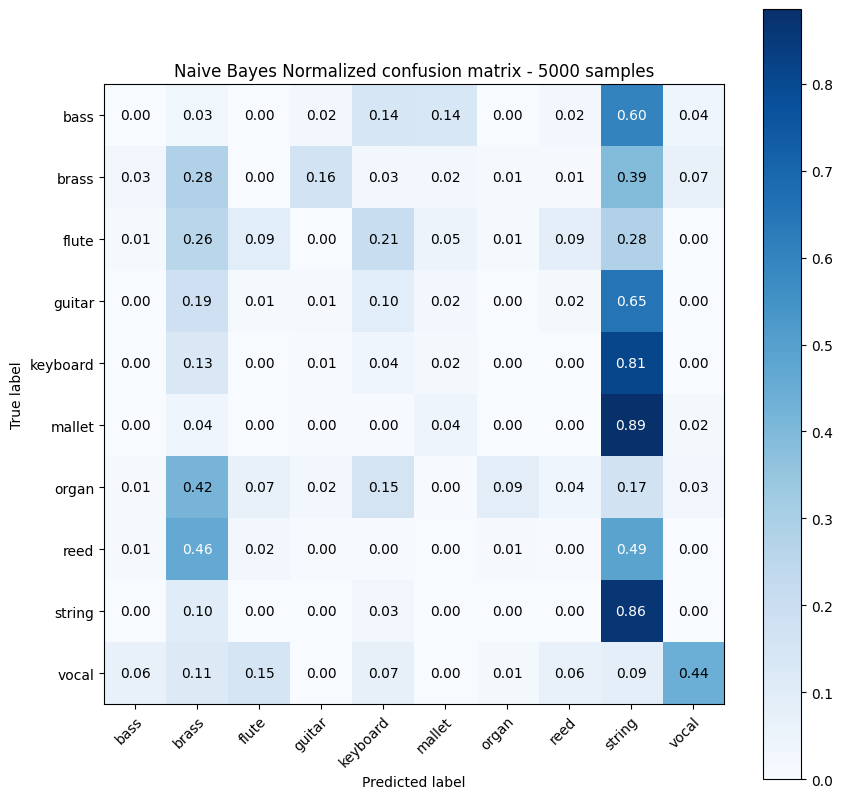

In [ ]:
plot_confusion_matrix(y_test, y_pred_NB, classes=class_names, normalize=True,
                      title='Naive Bayes Normalized confusion matrix - 5000 samples')

# Random Forest - Default Hyperparameters

In [ ]:
#instantiate the random forest
clf_Rf =RandomForestClassifier()

In [ ]:
#Train
clf_Rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_RF = clf_Rf.predict(X_test)
accuracy_RF = np.mean(y_pred_RF == y_test)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF))

The accuracy of Random Forest is 60.40%


Normalized confusion matrix
[[0.62040332 0.         0.         0.08540925 0.08896797 0.17912218
  0.0118624  0.00830368 0.00118624 0.00474496]
 [0.0260223  0.70260223 0.02230483 0.02230483 0.00743494 0.
  0.         0.03345725 0.         0.18587361]
 [0.02777778 0.00555556 0.8        0.         0.         0.00555556
  0.05555556 0.04444444 0.         0.06111111]
 [0.16871166 0.00613497 0.00613497 0.53680982 0.22546012 0.04907975
  0.00613497 0.00153374 0.         0.        ]
 [0.18668407 0.01827676 0.01305483 0.21932115 0.48302872 0.04830287
  0.01305483 0.         0.01174935 0.00652742]
 [0.12871287 0.0049505  0.         0.03465347 0.14356436 0.66831683
  0.01485149 0.         0.0049505  0.        ]
 [0.10557769 0.01195219 0.04183267 0.         0.03784861 0.03784861
  0.57968127 0.05776892 0.03386454 0.0936255 ]
 [0.         0.28510638 0.08510638 0.08085106 0.         0.
  0.         0.42978723 0.11489362 0.00425532]
 [0.05882353 0.00326797 0.         0.02941176 0.00653595 0.01960784


<Axes: title={'center': 'Random Forest Normalized confusion matrix - 5000 samples'}, xlabel='Predicted label', ylabel='True label'>

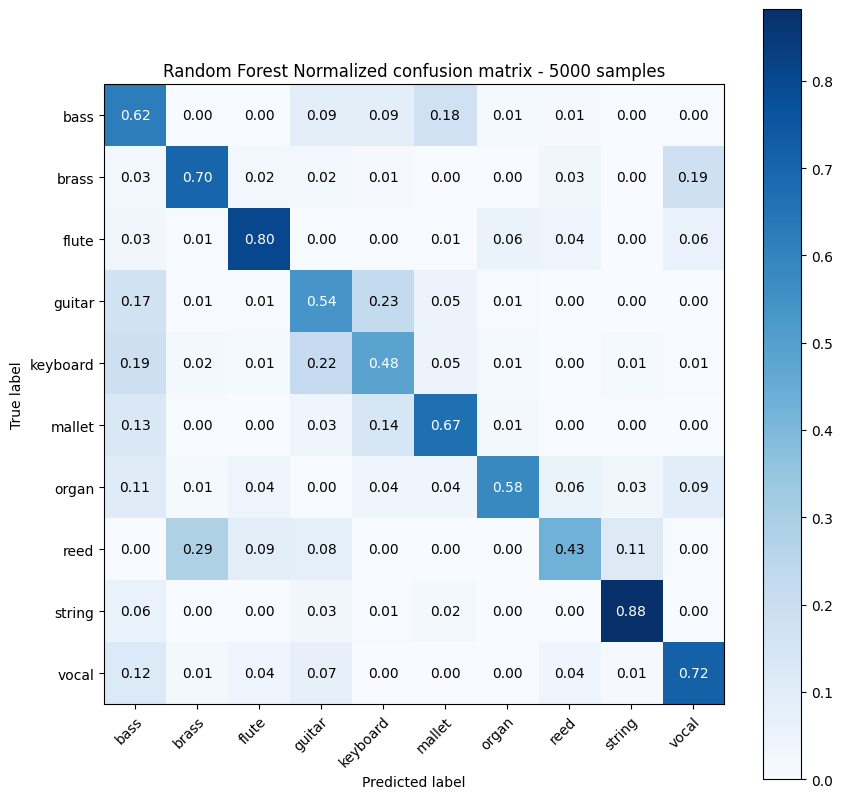

In [ ]:
plot_confusion_matrix(y_test, y_pred_RF, classes=class_names, normalize=True,
                      title='Random Forest Normalized confusion matrix - 5000 samples')

# Random Forest - Random Search

In [ ]:
#instantiate the random forest
clf_Rf_RS=RandomForestClassifier()

In [ ]:
param_rs = {
    "n_estimators" : [32, 64, 128, 256, 512],
    "max_depth": [None, 8, 16, 32, 64],
    "max_features": sp_randint(1, 10),
    "min_samples_split": sp_randint(2, 10),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
    }

In [ ]:
#Random Search
random_search_RF = RandomizedSearchCV(estimator=clf_Rf_RS,
                                      param_distributions=param_rs,
                                      n_iter=15,
                                      cv=5,
                                      n_jobs=-1,
                                      verbose=2)
#Train
random_search_RF.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 8, 16, 32, 64],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7832e5036fb0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7832e5061660>,
                                        'n_estimators': [32, 64, 128, 256,
                                                         512]},
                   verbose=2)

In [ ]:
random_search_RF.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=8,
                       n_estimators=256)

In [ ]:
print("Random Search Best Parameters:")
print(random_search_RF.best_params_)

Random Search Best Parameters:
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 256}


In [ ]:
y_pred_RF_random = random_search_RF.predict(X_test)
accuracy_RF_random = np.mean(y_pred_RF_random == y_test)
print("The accuracy of Random Forest - Random Search is {0:.2%}".format(accuracy_RF_random))

The accuracy of Random Forest - Random Search is 61.18%


Normalized confusion matrix
[[0.61565836 0.         0.         0.07236062 0.10320285 0.18623962
  0.00948992 0.00830368 0.         0.00474496]
 [0.17100372 0.68401487 0.02973978 0.05204461 0.01858736 0.
  0.         0.0260223  0.         0.01858736]
 [0.02222222 0.         0.76666667 0.         0.         0.02777778
  0.06111111 0.03888889 0.         0.08333333]
 [0.16104294 0.         0.00613497 0.5398773  0.24233129 0.03834356
  0.0107362  0.00153374 0.         0.        ]
 [0.154047   0.01697128 0.00522193 0.21148825 0.53655352 0.04438642
  0.02219321 0.         0.00522193 0.00391645]
 [0.08415842 0.00990099 0.         0.03465347 0.22772277 0.63861386
  0.         0.         0.0049505  0.        ]
 [0.08167331 0.00796813 0.05378486 0.         0.0438247  0.04581673
  0.58167331 0.05179283 0.03784861 0.09561753]
 [0.         0.30638298 0.07659574 0.05106383 0.         0.
  0.         0.43829787 0.11489362 0.01276596]
 [0.03594771 0.00326797 0.         0.01633987 0.00326797 0.02287582


<Axes: title={'center': 'Random Forest Randomized Search Normalized confusion matrix - 5000 samples'}, xlabel='Predicted label', ylabel='True label'>

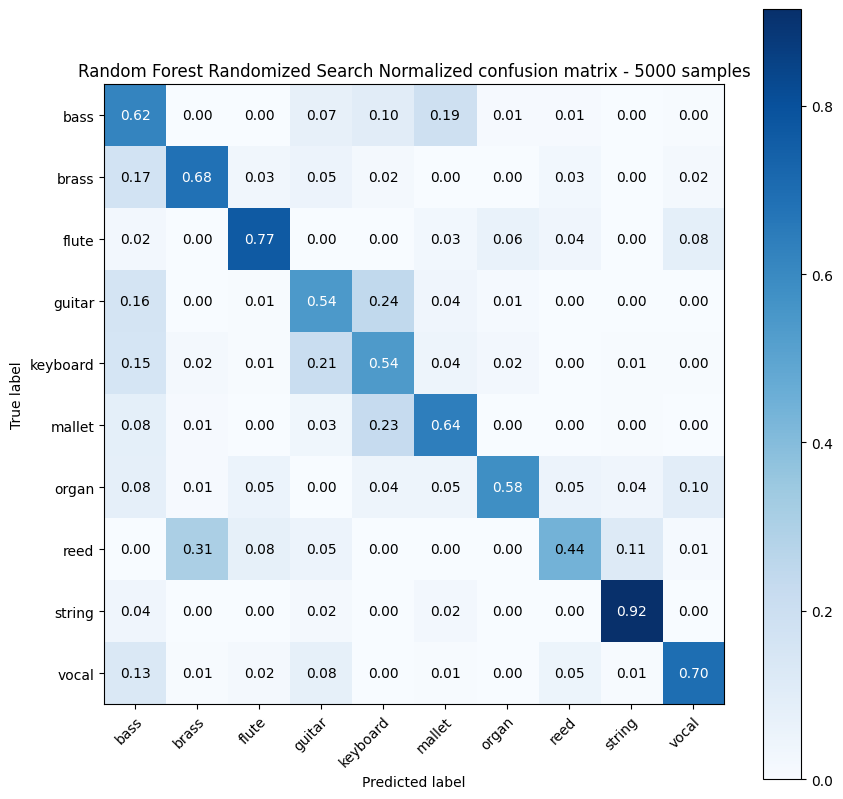

In [ ]:
plot_confusion_matrix(y_test, y_pred_RF_random, classes=class_names, normalize=True,
                      title='Random Forest Randomized Search Normalized confusion matrix - 5000 samples')

# SVM

In [23]:
#Scale and preprocess the data for the SVM
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [24]:
#instatiate the  classifier
SVM = SVC(C = 1)

In [25]:
#Train
SVM.fit(X_train_scaled, y_train)

SVC(C=1)

In [26]:
y_pred_svm = SVM.predict(X_test_scaled)
accuracy_svm = np.mean(y_pred_svm == y_test)
print("The accuracy of SVMs is {0:.2%}".format(accuracy_svm))

The accuracy of SVMs is 40.38%


Normalized confusion matrix
[[0.28706999 0.00237248 0.01779359 0.08778173 0.22064057 0.24911032
  0.00474496 0.03914591 0.04744958 0.04389087]
 [0.03717472 0.57249071 0.0260223  0.16356877 0.02230483 0.00743494
  0.00371747 0.05947955 0.00743494 0.10037175]
 [0.14444444 0.05555556 0.52777778 0.07777778 0.02777778 0.02222222
  0.03888889 0.10555556 0.         0.        ]
 [0.07361963 0.12116564 0.12269939 0.18404908 0.28374233 0.10582822
  0.01993865 0.02300613 0.05521472 0.0107362 ]
 [0.07441253 0.12010444 0.03655352 0.02610966 0.41644909 0.12010444
  0.03785901 0.07310705 0.09399478 0.00130548]
 [0.03960396 0.1039604  0.         0.12871287 0.03960396 0.46039604
  0.01485149 0.03960396 0.13861386 0.03465347]
 [0.08167331 0.00996016 0.16533865 0.         0.0059761  0.00398406
  0.5059761  0.06175299 0.01394422 0.15139442]
 [0.         0.22553191 0.15744681 0.00851064 0.00851064 0.0212766
  0.00425532 0.27659574 0.28085106 0.01702128]
 [0.         0.         0.03594771 0.03267974 0.07189

<Axes: title={'center': 'SVM Normalized confusion matrix - 5000 samples'}, xlabel='Predicted label', ylabel='True label'>

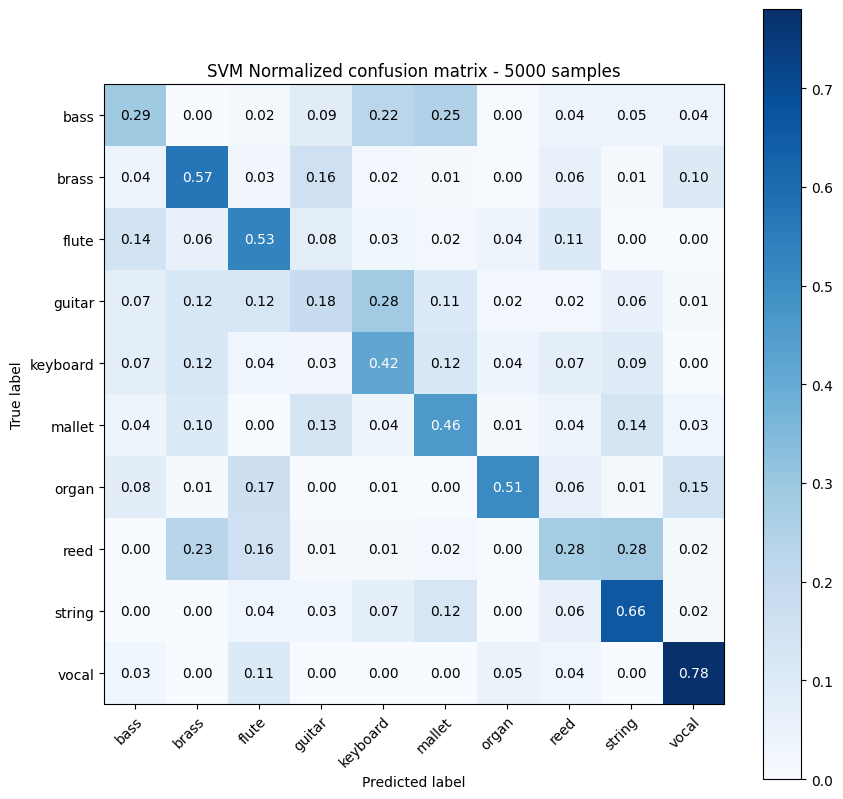

In [27]:
plot_confusion_matrix(y_test, y_pred_svm, classes=class_names, normalize=True,
                      title='SVM Normalized confusion matrix - 5000 samples')